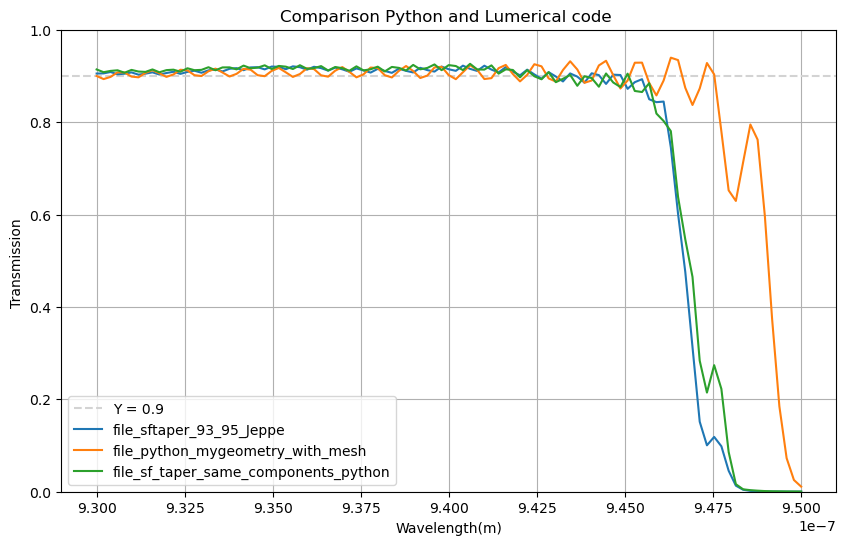

In [9]:
import numpy as np

import matplotlib.pyplot as plt

#this file is the file with 2 ports that Jeppe has done before but we cannot use port for our optimization, we need to use only monitor 
file_sf_taper = """

lambda, Y
9.5e-07, 0.000204782
9.49794e-07, 0.000156073
9.49587e-07, 0.000246217
9.49381e-07, 0.000381256
9.49175e-07, 0.000414596
9.48969e-07, 0.000638246
9.48763e-07, 0.000909463
9.48558e-07, 0.00181113
9.48352e-07, 0.00427207
9.48146e-07, 0.0131132
9.47941e-07, 0.0454529
9.47735e-07, 0.0983846
9.4753e-07, 0.118641
9.47325e-07, 0.100462
9.4712e-07, 0.151492
9.46915e-07, 0.313194
9.4671e-07, 0.475813
9.46505e-07, 0.601438
9.463e-07, 0.745314
9.46095e-07, 0.844501
9.45891e-07, 0.843203
9.45686e-07, 0.849505
9.45482e-07, 0.892932
9.45277e-07, 0.886468
9.45073e-07, 0.871988
9.44869e-07, 0.901956
9.44665e-07, 0.902695
9.44461e-07, 0.882652
9.44257e-07, 0.90172
9.44053e-07, 0.905676
9.43849e-07, 0.88539
9.43645e-07, 0.89849
9.43442e-07, 0.905421
9.43238e-07, 0.888036
9.43035e-07, 0.898739
9.42832e-07, 0.908071
9.42629e-07, 0.893861
9.42425e-07, 0.903225
9.42222e-07, 0.91353
9.42019e-07, 0.901333
9.41817e-07, 0.909181
9.41614e-07, 0.919005
9.41411e-07, 0.907582
9.41208e-07, 0.913659
9.41006e-07, 0.922127
9.40803e-07, 0.910813
9.40601e-07, 0.915289
9.40399e-07, 0.922241
9.40197e-07, 0.910999
9.39995e-07, 0.914453
9.39793e-07, 0.920215
9.39591e-07, 0.909375
9.39389e-07, 0.912527
9.39187e-07, 0.917577
9.38986e-07, 0.907523
9.38784e-07, 0.910969
9.38582e-07, 0.915679
9.38381e-07, 0.906643
9.3818e-07, 0.910714
9.37979e-07, 0.915228
9.37777e-07, 0.907225
9.37576e-07, 0.911966
9.37375e-07, 0.916203
9.37175e-07, 0.909054
9.36974e-07, 0.914291
9.36773e-07, 0.918015
9.36572e-07, 0.911437
9.36372e-07, 0.916882
9.36171e-07, 0.919801
9.35971e-07, 0.913507
9.35771e-07, 0.918869
9.35571e-07, 0.920742
9.35371e-07, 0.914532
9.35171e-07, 0.91961
9.34971e-07, 0.920319
9.34771e-07, 0.914139
9.34571e-07, 0.918865
9.34371e-07, 0.918449
9.34172e-07, 0.912398
9.33972e-07, 0.916839
9.33773e-07, 0.915471
9.33573e-07, 0.90976
9.33374e-07, 0.914071
9.33175e-07, 0.912003
9.32976e-07, 0.906893
9.32777e-07, 0.911247
9.32578e-07, 0.908742
9.32379e-07, 0.90447
9.32181e-07, 0.909002
9.31982e-07, 0.906274
9.31783e-07, 0.903001
9.31585e-07, 0.907756
9.31386e-07, 0.904937
9.31188e-07, 0.902717
9.3099e-07, 0.907639
9.30792e-07, 0.904766
9.30594e-07, 0.903546
9.30396e-07, 0.908485
9.30198e-07, 0.905514
9.3e-07, 0.905153

"""

#here there is the same wg(tapered)
file_python1="""


lambda(m), Y
9.5e-07, 0.0110039
9.49794e-07, 0.0254024
9.49587e-07, 0.0726744
9.49381e-07, 0.184898
9.49175e-07, 0.373877
9.48969e-07, 0.596868
9.48763e-07, 0.762167
9.48558e-07, 0.794804
9.48352e-07, 0.71306
9.48146e-07, 0.629409
9.47941e-07, 0.652326
9.47735e-07, 0.779713
9.4753e-07, 0.903295
9.47325e-07, 0.927929
9.4712e-07, 0.872862
9.46915e-07, 0.83708
9.4671e-07, 0.874298
9.46505e-07, 0.934277
9.463e-07, 0.939491
9.46095e-07, 0.890039
9.45891e-07, 0.857791
9.45686e-07, 0.884707
9.45482e-07, 0.928766
9.45277e-07, 0.928579
9.45073e-07, 0.890062
9.44869e-07, 0.872789
9.44665e-07, 0.901419
9.44461e-07, 0.932789
9.44257e-07, 0.922684
9.44053e-07, 0.890037
9.43849e-07, 0.885181
9.43645e-07, 0.913917
9.43442e-07, 0.931682
9.43238e-07, 0.912808
9.43035e-07, 0.887828
9.42832e-07, 0.89456
9.42629e-07, 0.920753
9.42425e-07, 0.925324
9.42222e-07, 0.902305
9.42019e-07, 0.888197
9.41817e-07, 0.904028
9.41614e-07, 0.923821
9.41411e-07, 0.916805
9.41208e-07, 0.895175
9.41006e-07, 0.893269
9.40803e-07, 0.913255
9.40601e-07, 0.923119
9.40399e-07, 0.908064
9.40197e-07, 0.892946
9.39995e-07, 0.9017
9.39793e-07, 0.919752
9.39591e-07, 0.918446
9.39389e-07, 0.90078
9.39187e-07, 0.895487
9.38986e-07, 0.910602
9.38784e-07, 0.921455
9.38582e-07, 0.911011
9.38381e-07, 0.896712
9.3818e-07, 0.901514
9.37979e-07, 0.917067
9.37777e-07, 0.91809
9.37576e-07, 0.903381
9.37375e-07, 0.89698
9.37175e-07, 0.908811
9.36974e-07, 0.919176
9.36773e-07, 0.91134
9.36572e-07, 0.898396
9.36372e-07, 0.901282
9.36171e-07, 0.914766
9.35971e-07, 0.916647
9.35771e-07, 0.90414
9.35571e-07, 0.897847
9.35371e-07, 0.907735
9.35171e-07, 0.917255
9.34971e-07, 0.910912
9.34771e-07, 0.899415
9.34571e-07, 0.901576
9.34371e-07, 0.913488
9.34172e-07, 0.91545
9.33972e-07, 0.904477
9.33773e-07, 0.898748
9.33573e-07, 0.90741
9.33374e-07, 0.915842
9.33175e-07, 0.910115
9.32976e-07, 0.899755
9.32777e-07, 0.901598
9.32578e-07, 0.912034
9.32379e-07, 0.913383
9.32181e-07, 0.903201
9.31982e-07, 0.897946
9.31783e-07, 0.905533
9.31585e-07, 0.91251
9.31386e-07, 0.906637
9.31188e-07, 0.896987
9.3099e-07, 0.898566
9.30792e-07, 0.907482
9.30594e-07, 0.907757
9.30396e-07, 0.897921
9.30198e-07, 0.893146
9.3e-07, 0.899884

"""

#For this file , we use the same components as in my geometry because we cannot use ports for optimizing
file_sf_taper2="""
lambda(m), Y
9.5e-07, 0.000379505
9.49794e-07, 0.000538587
9.49587e-07, 0.000580781
9.49381e-07, 0.000776212
9.49175e-07, 0.000943441
9.48969e-07, 0.00141687
9.48763e-07, 0.00228356
9.48558e-07, 0.00337054
9.48352e-07, 0.00523821
9.48146e-07, 0.0162916
9.47941e-07, 0.0861876
9.47735e-07, 0.222466
9.4753e-07, 0.273903
9.47325e-07, 0.214604
9.4712e-07, 0.283413
9.46915e-07, 0.464999
9.4671e-07, 0.546192
9.46505e-07, 0.638045
9.463e-07, 0.780509
9.46095e-07, 0.8024
9.45891e-07, 0.818548
9.45686e-07, 0.884265
9.45482e-07, 0.865154
9.45277e-07, 0.867458
9.45073e-07, 0.904911
9.44869e-07, 0.876005
9.44665e-07, 0.885787
9.44461e-07, 0.905279
9.44257e-07, 0.876675
9.44053e-07, 0.895337
9.43849e-07, 0.899205
9.43645e-07, 0.878673
9.43442e-07, 0.902236
9.43238e-07, 0.893758
9.43035e-07, 0.886462
9.42832e-07, 0.908178
9.42629e-07, 0.892748
9.42425e-07, 0.899242
9.42222e-07, 0.912474
9.42019e-07, 0.896952
9.41817e-07, 0.912901
9.41614e-07, 0.914226
9.41411e-07, 0.904939
9.41208e-07, 0.922807
9.41006e-07, 0.91374
9.40803e-07, 0.914054
9.40601e-07, 0.926212
9.40399e-07, 0.912563
9.40197e-07, 0.921407
9.39995e-07, 0.923406
9.39793e-07, 0.912481
9.39591e-07, 0.924863
9.39389e-07, 0.917286
9.39187e-07, 0.914306
9.38986e-07, 0.923811
9.38784e-07, 0.911746
9.38582e-07, 0.917364
9.38381e-07, 0.919456
9.3818e-07, 0.909732
9.37979e-07, 0.919999
9.37777e-07, 0.914353
9.37576e-07, 0.911939
9.37375e-07, 0.920735
9.37175e-07, 0.911251
9.36974e-07, 0.916736
9.36773e-07, 0.919292
9.36572e-07, 0.911734
9.36372e-07, 0.921274
9.36171e-07, 0.916774
9.35971e-07, 0.915394
9.35771e-07, 0.923137
9.35571e-07, 0.914925
9.35371e-07, 0.920045
9.35171e-07, 0.921614
9.34971e-07, 0.914939
9.34771e-07, 0.922943
9.34571e-07, 0.9179
9.34371e-07, 0.916627
9.34172e-07, 0.922326
9.33972e-07, 0.914183
9.33773e-07, 0.918509
9.33573e-07, 0.918387
9.33374e-07, 0.912232
9.33175e-07, 0.918783
9.32976e-07, 0.913108
9.32777e-07, 0.912382
9.32578e-07, 0.916562
9.32379e-07, 0.909054
9.32181e-07, 0.913522
9.31982e-07, 0.912543
9.31783e-07, 0.907881
9.31585e-07, 0.914038
9.31386e-07, 0.908663
9.31188e-07, 0.909471
9.3099e-07, 0.913014
9.30792e-07, 0.906908
9.30594e-07, 0.91218
9.30396e-07, 0.910869
9.30198e-07, 0.908056
9.3e-07, 0.913994

"""
#My geometry without mesh for opt fields and fom

file_python2="""

lambda(m), Y
9.5e-07, 0.000379496
9.49794e-07, 0.000538579
9.49587e-07, 0.000580774
9.49381e-07, 0.000776206
9.49175e-07, 0.000943428
9.48969e-07, 0.00141684
9.48763e-07, 0.0022835
9.48558e-07, 0.00337044
9.48352e-07, 0.00523805
9.48146e-07, 0.0162912
9.47941e-07, 0.0861846
9.47735e-07, 0.222456
9.4753e-07, 0.273884
9.47325e-07, 0.214586
9.4712e-07, 0.283398
9.46915e-07, 0.464985
9.4671e-07, 0.546186
9.46505e-07, 0.638052
9.463e-07, 0.78052
9.46095e-07, 0.80241
9.45891e-07, 0.818557
9.45686e-07, 0.884271
9.45482e-07, 0.865157
9.45277e-07, 0.867461
9.45073e-07, 0.904911
9.44869e-07, 0.876004
9.44665e-07, 0.885785
9.44461e-07, 0.905275
9.44257e-07, 0.876669
9.44053e-07, 0.89533
9.43849e-07, 0.899197
9.43645e-07, 0.878664
9.43442e-07, 0.902226
9.43238e-07, 0.893747
9.43035e-07, 0.886451
9.42832e-07, 0.908167
9.42629e-07, 0.892737
9.42425e-07, 0.899232
9.42222e-07, 0.912464
9.42019e-07, 0.896943
9.41817e-07, 0.912894
9.41614e-07, 0.914219
9.41411e-07, 0.904934
9.41208e-07, 0.922802
9.41006e-07, 0.913735
9.40803e-07, 0.91405
9.40601e-07, 0.926209
9.40399e-07, 0.91256
9.40197e-07, 0.921405
9.39995e-07, 0.923403
9.39793e-07, 0.912477
9.39591e-07, 0.924859
9.39389e-07, 0.917282
9.39187e-07, 0.914302
9.38986e-07, 0.923806
9.38784e-07, 0.911741
9.38582e-07, 0.917359
9.38381e-07, 0.91945
9.3818e-07, 0.909726
9.37979e-07, 0.919993
9.37777e-07, 0.914347
9.37576e-07, 0.911933
9.37375e-07, 0.920729
9.37175e-07, 0.911245
9.36974e-07, 0.91673
9.36773e-07, 0.919286
9.36572e-07, 0.911729
9.36372e-07, 0.921269
9.36171e-07, 0.916769
9.35971e-07, 0.91539
9.35771e-07, 0.923133
9.35571e-07, 0.914921
9.35371e-07, 0.920042
9.35171e-07, 0.921611
9.34971e-07, 0.914936
9.34771e-07, 0.922941
9.34571e-07, 0.917898
9.34371e-07, 0.916625
9.34172e-07, 0.922323
9.33972e-07, 0.914181
9.33773e-07, 0.918507
9.33573e-07, 0.918385
9.33374e-07, 0.91223
9.33175e-07, 0.918781
9.32976e-07, 0.913106
9.32777e-07, 0.912379
9.32578e-07, 0.916559
9.32379e-07, 0.909052
9.32181e-07, 0.913519
9.31982e-07, 0.91254
9.31783e-07, 0.907879
9.31585e-07, 0.914035
9.31386e-07, 0.90866
9.31188e-07, 0.909468
9.3099e-07, 0.913011
9.30792e-07, 0.906906
9.30594e-07, 0.912177
9.30396e-07, 0.910866
9.30198e-07, 0.908054
9.3e-07, 0.913991


"""

lambda_values = []
lambda_values1=[]
lambda_values2=[]
lambda_values3=[]

Y_values_file_sf_taper = []
Y_values_file_python1 = []
Y_values_file_sf_taper2 = []
Y_values_file_python2 = []
# Split the content into lines
lines = file_sf_taper.strip().split("\n")
lines1 = file_python1.strip().split("\n")
lines2 = file_sf_taper2.strip().split("\n")
lines3 = file_python2.strip().split("\n")

for line in lines[1:]:
    # Split the line by comma
    parts = line.split(",")
    # Extract lambda and Y values
    lambda_val = float(parts[0])
    Y_val = float(parts[1])
    # Append to respective lists
    lambda_values.append(lambda_val)
    Y_values_file_sf_taper.append(Y_val)


for line in lines1[1:]:
    # Split the line by comma
    parts = line.split(",")
    # Extract lambda and Y values
    lambda_val = float(parts[0])
    Y_val = float(parts[1])
    # Append to respective lists
    lambda_values1.append(lambda_val)
    Y_values_file_python1.append(Y_val)

for line in lines2[1:]:
    # Split the line by comma
    parts = line.split(",")
    # Extract lambda and Y values
    lambda_val = float(parts[0])
    Y_val = float(parts[1])
    # Append to respective lists
    lambda_values2.append(lambda_val)
    Y_values_file_sf_taper2.append(Y_val)

for line in lines3[1:]:
    # Split the line by comma
    parts = line.split(",")
    # Extract lambda and Y values
    lambda_val = float(parts[0])
    Y_val = float(parts[1])
    # Append to respective lists
    lambda_values3.append(lambda_val)
    Y_values_file_python2.append(Y_val)


plt.figure(figsize=(10, 6))
plt.axhline(y=0.9, color='lightgray', linestyle='--', label="Y = 0.9")
plt.plot(lambda_values, Y_values_file_sf_taper, label="file_sftaper_93_95_Jeppe", linestyle="-")
plt.plot(lambda_values1, Y_values_file_python1, label="file_python_mygeometry_with_mesh", linestyle="-")
plt.plot(lambda_values2, Y_values_file_sf_taper2, label="file_sf_taper_same_components_python", linestyle="-")
plt.plot(lambda_values3, Y_values_file_python2, label="file_python_mygeometry_without_mesh", linestyle="-")
plt.xlabel("Wavelength(m)")
plt.ylabel("Transmission ")
plt.title("Comparison Python and Lumerical code ")
plt.ylim(0,1.0)
plt.legend()
plt.grid(True)
plt.show()